## Bestfer Solution MVP

**Features**
1. Total Units Sold x Months Graph
2. Total Sales x Months Graph

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## The data at a glance

**Read .csv file from folder (BFH-LEDE)**

In [2]:
data = pd.read_csv('./data/data.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/data.csv'

**Display .csv file as table**

In [ ]:
data.head()

In [3]:
data.describe().head()

NameError: name 'data' is not defined

In [4]:
data.info()

NameError: name 'data' is not defined

In [5]:
data.isna().sum()

NameError: name 'data' is not defined

In [17]:
data.size

33860

**Dimensions of data**

In [20]:
data.shape

(1693, 20)

## Handling Missing Data

**Remove `null` values from data**

In [21]:
data = data.dropna()

Remove `null` values

In [22]:
data.isna().sum()

Unnamed: 0                            0
Codigo                                0
Descrição       -       31/07/2022    0
UM                                    0
Import?                               0
Feb-22                                0
Mar-22                                0
Apr-22                                0
May-22                                0
Jun-22                                0
Jul-22                                0
Total                                 0
Saldo                                 0
Freq.                                 0
Media                                 0
Tempo                                 0
FOB                                   0
Venda                                 0
Ativo                                 0
Entrada Prevista                      0
dtype: int64

All `null` values have been removed

## Cleaning Data

**Check if there are any `inactive` items**

In [29]:
data['Ativo'].unique()f

array(['S', 'N'], dtype=object)

**Remove`inactive` items (Ativo = N)**

In [30]:
data = data[data['Ativo'].str.contains('N') == False]

In [31]:
data['Ativo'].unique()

array(['S'], dtype=object)

Successfully removed the `inactive` items from the data

## Data Wrangling

### Total Units Sold x Months

**Store column name into a `list`**

In [58]:
column_name = list(data.columns)

**Create `dictionary` to store total sum of sales and their respective months**

In [105]:
total_units = [data[column_name[5]].sum(),data[column_name[6]].sum(),data[column_name[7]].sum(),data[column_name[8]].sum(),data[column_name[9]].sum(),data[column_name[10]].sum()]
months = [column_name[5],column_name[6],column_name[7],column_name[8],column_name[9],column_name[10]]
index = ['Total Units']
units_data = {'Total Units Sold' : total_units, 'Months' : months}

**Create graph to plot `total_units` against `months`**

In [122]:
units_df = pd.DataFrame(units_data)
units_df.head()

,Total Units Sold,Months
0,774161.90,Feb-22
1,1096649.92,Mar-22
2,1012810.00,Apr-22
3,915310.00,May-22
4,827942.00,Jun-22


<AxesSubplot:xlabel='Months'>

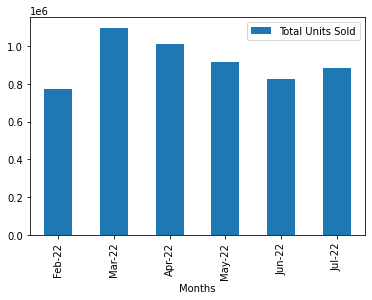

In [123]:
units_df.plot(x = 'Months', y = 'Total Units Sold', kind='bar')

### Total Sales x Months

**Calculate `mean` price of all proudcts**

In [132]:
avg_price = data['Venda'].mean()
avg_price

26.49056

**Multiply the `avg_price` by the entire column `Total Units Sold`**

In [133]:
sales_df = units_df

In [134]:
sales_df["Total Units Sold"] = avg_price * sales_df["Total Units Sold"]

**Create graph to plot `total_sales` against `months`**

In [135]:
sales_df.head()

,Total Units Sold,Months
0,5.432679e+08,Feb-22
1,7.695738e+08,Mar-22
2,7.107392e+08,Apr-22
3,6.423186e+08,May-22
4,5.810081e+08,Jun-22


In [136]:
sales_df = sales_df.rename(columns = {'Total Units Sold' : 'Total Sales'})

<AxesSubplot:xlabel='Months'>

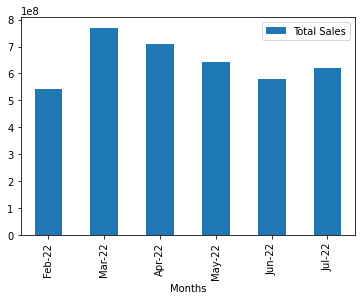

In [137]:
sales_df.plot(x = 'Months', y = 'Total Sales', kind='bar')